In [ ]:
#install and import packages
!pip install --upgrade scikit-learn
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
#statistics

In [ ]:
#print python version for report
!python ‐‐version
import sys; print(sys.version)

python3: can't open file '/content/‐‐version': [Errno 2] No such file or directory
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
#read and display data
data = pd.read_csv("/content/winequality-red.csv", sep = ";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#display information about dataset for report
data.columns
print(data.groupby(['quality']).count())

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                   10                10           10              10   
4                   53                53           53              53   
5                  681               681          681             681   
6                  638               638          638             638   
7                  199               199          199             199   
8                   18                18           18              18   

         chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
quality                                                                       
3               10                   10                    10       10   10   
4               53                   53                    53       53   53   
5              681                  681                   681      681  681   
6              638  

In [ ]:
#split into features/target
x = data.drop(columns = ['quality'])
#attemptd normalization at one point but this step yielded lower performance
#x_norm = sklearn.preprocessing.normalize(x, axis=0)
y = data['quality']

In [ ]:
#function to report relevant metrics
def return_metrics(y_test, y_pred):
  from sklearn import metrics
  print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))
  print(metrics.balanced_accuracy_score(y_test, y_pred))
  print(metrics.classification_report(y_test, y_pred))
  print(metrics.confusion_matrix(y_test, y_pred))
  return metrics.balanced_accuracy_score(y_test, y_pred)

In [ ]:
#suppress warnings about class imbalances
import warnings
warnings.filterwarnings("ignore")

#import models, packages
from sklearn import linear_model, ensemble, neural_network
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import numpy

#models to compare
models = [linear_model.RidgeClassifier(), ensemble.AdaBoostClassifier(), ensemble.BaggingClassifier(), ensemble.RandomForestClassifier(), linear_model.LogisticRegression(), linear_model.Perceptron(), linear_model.SGDClassifier(), neural_network.MLPClassifier(420, 'relu',)]
model_names = ["Ridge Classifier", "AdaBoost Classifier", "Bagging Classifier", "RandomForest Classifier", "Logistic Regression Classifier", "Perceptron Classifier", "SGD Classifier", "MLP Classifier"]

max_score = 0
max_index = 0

best_y_pred = None
best_y_test = None

#compare models
for i in range(len(models)):
  y_preds = []
  y_tests = []
  #five trials for each
  for j in range(0, 5):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
      x, y, test_size=0.2, random_state=42)
    m = models[i]
    #10-fold cross-validation to determine best parameters
    scores = sklearn.model_selection.cross_validate(m, x_train, y_train, cv=10, scoring = "balanced_accuracy", return_estimator=True)
    best = list(scores["test_score"]).index(max(scores["test_score"]))
    best_model = scores["estimator"][best]
    y_pred = best_model.predict(x_test)
    y_preds.extend(y_pred)
    print(y_preds)
    y_tests.extend(y_test)
    print(y_tests)
  model_metrics = return_metrics(y_tests, y_preds)
    #print last trial for comparison purposes
    #if j == 4:
      #print(model_names[i] + " Performance:")
      #return_metrics(y_test, y_pred)
  #save model with average best performance
  if model_metrics > max_score:
    max_score = model_metrics
    max_index = i
    best_y_pred = y_preds
    best_y_test = y_tests
#print name of best model
print(max_score, model_names[max_index])

[5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 7, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5]
[6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5,

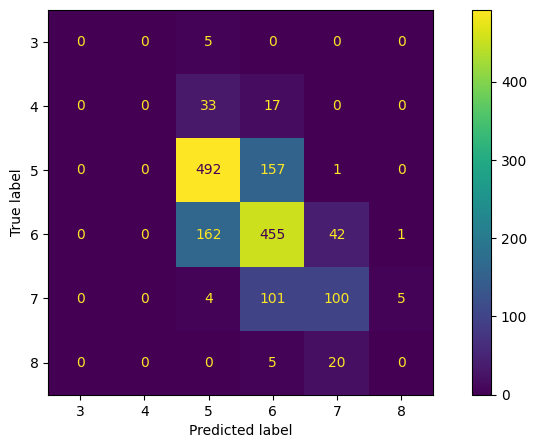

In [ ]:
#plot confusion matrix to visualize true/false positives/negatives among classes
fig, ax = plt.subplots(figsize=(10, 5))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(best_y_test, best_y_pred, ax=ax)